<a href="https://colab.research.google.com/github/Divyanshupatil/Streaming-Platform-Insights-with-SQL-and-Python/blob/main/Streaming%20Platform%20Insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Loading

In [2]:
import pandas as pd

# load the dataset
df = pd.read_csv('netflix_titles.csv')

#Display top 5 rows
print(df.head(5))

#check for missing values.
print(df.isnull().sum())


  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

# Data Cleaning

In [3]:
# Drop duplicates if any
# Remove 'genres' column before dropping duplicates
df.drop(columns=['genres'], inplace=True, errors='ignore')  # errors='ignore' handles if 'genres' column doesn't exist
df.drop_duplicates(inplace = True)

#Convert 'date_added' to datetime
df['date_added'] = pd.to_datetime(df['date_added'], format = 'mixed')

#Fill Null values in key text fields
df['director'].fillna('Not Available', inplace=True)
df['cast'].fillna('Not Available', inplace=True)
df['country'].fillna('Unknown', inplace=True)

#Split 'listed_in' into list of generes
df['genres'] = df['listed_in'].apply(lambda x: x.split(', '))

# Extract year from 'date_added'
df['year_added'] = df['date_added'].dt.year



<ipython-input-3-9023e41ca583>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['director'].fillna('Not Available', inplace=True)
<ipython-input-3-9023e41ca583>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

# Exploratory Data Analysis

In [4]:
# How many movies vs TV Shows?
print(df['type'].value_counts())

# Top 10 countries producing content
print(df['country'].value_counts().head(10))

# Content added per year
print(df['year_added'].value_counts().sort_index())

#Most common genres
from collections import Counter
all_genres = sum(df['genres'],[])
print(Counter(all_genres).most_common(10))


type
Movie      6131
TV Show    2676
Name: count, dtype: int64
country
United States     2818
India              972
Unknown            831
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Name: count, dtype: int64
year_added
2008.0       2
2009.0       2
2010.0       1
2011.0      13
2012.0       3
2013.0      11
2014.0      24
2015.0      82
2016.0     429
2017.0    1188
2018.0    1649
2019.0    2016
2020.0    1879
2021.0    1498
Name: count, dtype: int64
[('International Movies', 2752), ('Dramas', 2427), ('Comedies', 1674), ('International TV Shows', 1351), ('Documentaries', 869), ('Action & Adventure', 859), ('TV Dramas', 763), ('Independent Movies', 756), ('Children & Family Movies', 641), ('Romantic Movies', 616)]


# 📈 Movies vs TV Shows Over Time

### Insight: Identify how content production shifted post-2020, whether TV content is rising, etc.

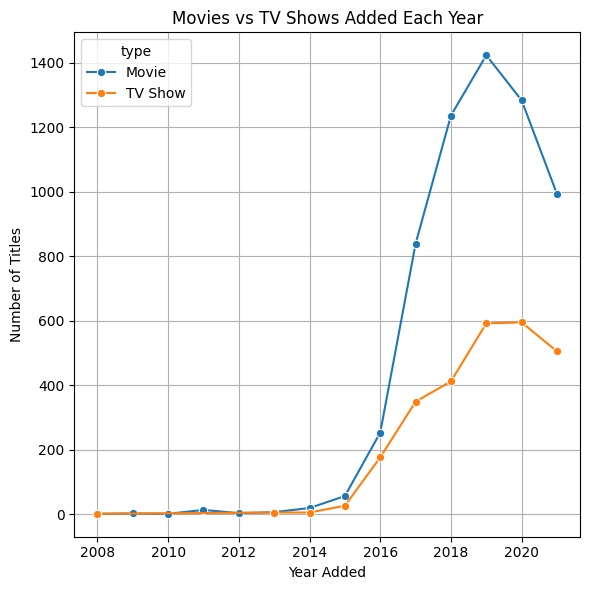

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

type_year = df.groupby(['year_added','type']).size().reset_index(name = 'count')
plt.figure(figsize=(6,6))
sns.lineplot(data = type_year, x='year_added',y='count',hue='type',marker = 'o')
plt.title('Movies vs TV Shows Added Each Year')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.tight_layout()
plt.show()



# 🌎 Top 10 Content-Producing Countries

### Insight: Understand Netflix’s global content focus.

<ipython-input-6-f5b5274b0908>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = top_countries.values, y = top_countries.index,palette = 'rocket')


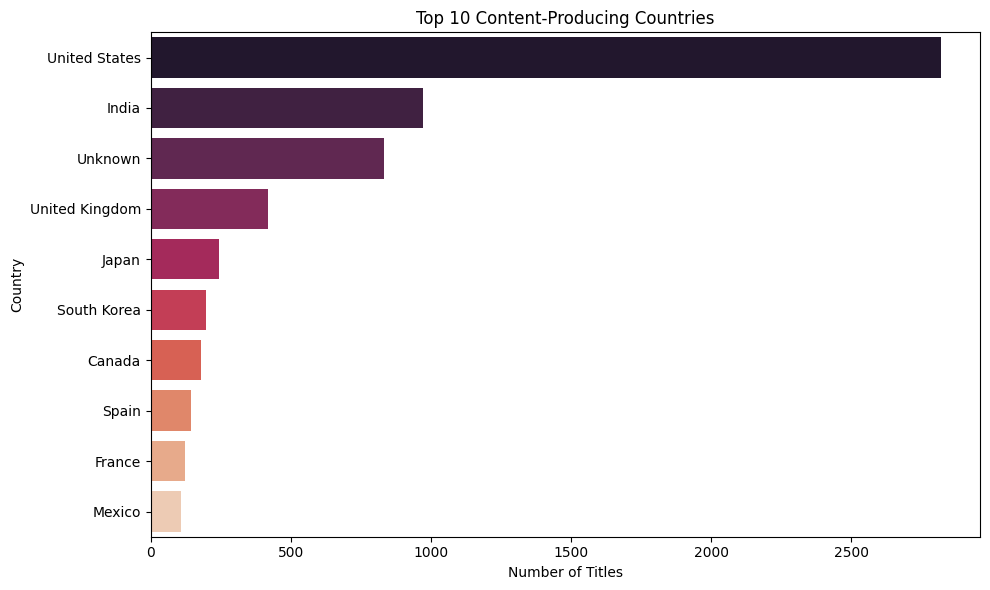

In [6]:
top_countries = df['country'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x = top_countries.values, y = top_countries.index,palette = 'rocket')
plt.title('Top 10 Content-Producing Countries')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

# 🎞️ Top 10 Frequent Genres

### Insight: Find what genres dominate the platform.



<ipython-input-7-3d2eb1e1cc62>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = df_genres, x='count',y = 'genre', palette='viridis')


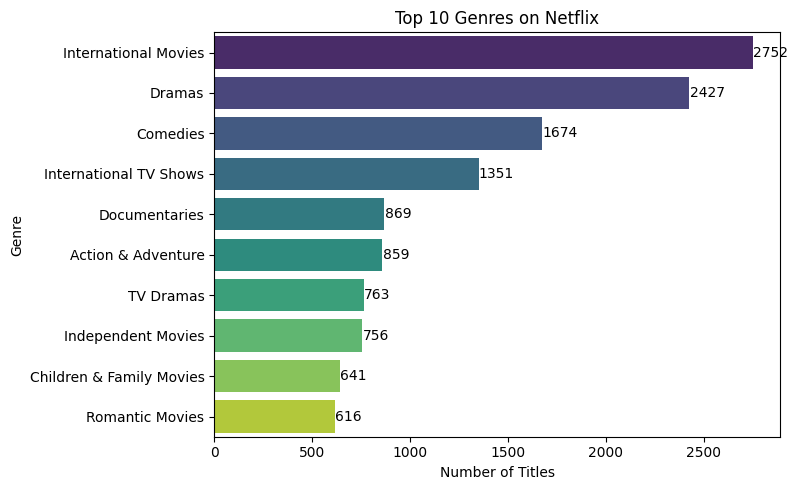

In [7]:
from collections import Counter

all_genres = sum(df['genres'],[])
top_genres = Counter(all_genres).most_common(10)

#convert to dataframe
df_genres = pd.DataFrame(top_genres, columns = ['genre','count'])

plt.figure(figsize = (8,5))
ax = sns.barplot(data = df_genres, x='count',y = 'genre', palette='viridis')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.tight_layout()
for i in ax.patches:
    count = int(i.get_width())
    y_pos = i.get_y() + i.get_height() / 2
    ax.text(count + 1, y_pos, str(count), va='center')
plt.show()

# 🕵️‍♀️ Most Frequent Directors

### Insight: Recognize directors with strong Netflix presence.



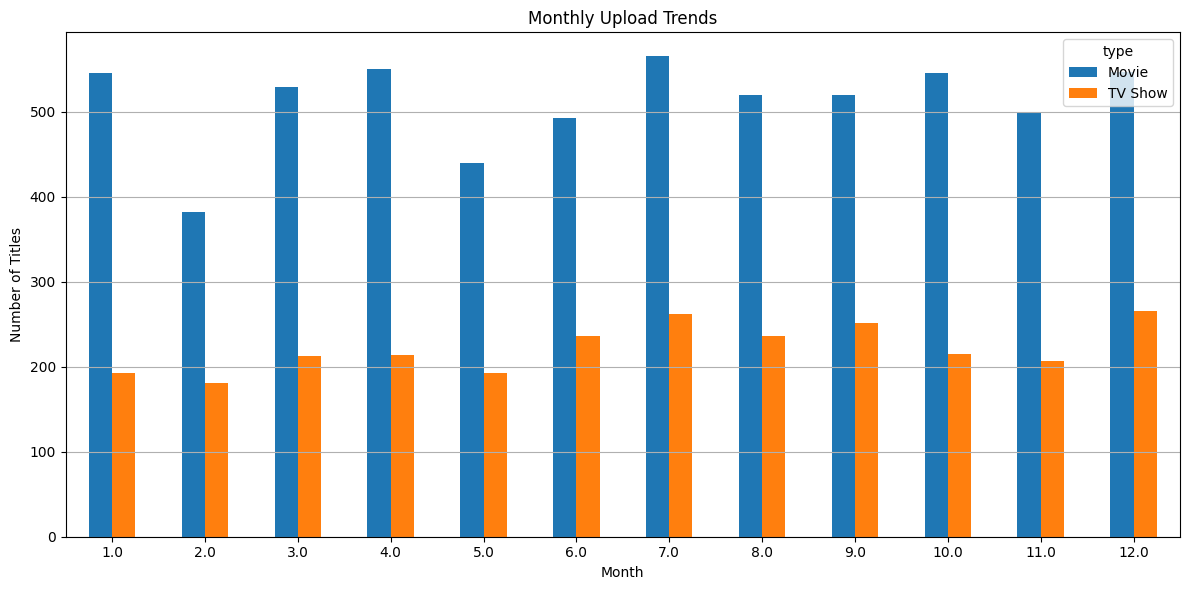

In [8]:
df['month_added'] = df['date_added'].dt.month

monthly_counts = df.groupby(['month_added', 'type']).size().unstack().fillna(0)

monthly_counts.plot(kind='bar', figsize=(12, 6))
plt.title('Monthly Upload Trends')
plt.xlabel('Month')
plt.ylabel('Number of Titles')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


# Save Clean File

In [9]:
df.to_csv('netflix_titles_clean.csv', index=False)